# Alessandro Pomponio - 0000920265

1. load the data into a dataframe df, show its size and head, eliminate
the rows containing null values and show the number of remaining
rows (2pt)
2. produce a pairplot of the numeric columns of df and comment
relevant situations (2pt)
3. Produce a box plot of the numeric columns of df and comment
relevant situations (2pt)
4. Produce the correlation matrix of the data and eliminate the
redundant attributes, if it is adequate (4pt)
• For example, if attributes a and b have high correlation (e.g.
absolute value higher than 0.95) one of the two can be
eliminated
• Refer to this page for the generation of the correlation matrix
5. Split the reduced data: store the first column in a vector keys and the
others in a matrix X (2pt)
6. Find the best clustering scheme for the data (possibly reduced after
step 4) with a method of your choice, plot global silhouette index for
an appropriate range of hyperparameter(s) and show the chosen
hyperparameter(s) (4pt)
7. fit the clustering scheme to y, then produce the silhouette plot using
the function plot_silhouette contained in the attached file (4pt)
8. Perform a logarithmic transformation of the data (4pt)
• This means simply to apply the log function of numpy
• If one of the columns has zero or negative values, avoid its
transformation
9. repeat point 5 and 6 above and comment the comparison with the
result of point 6

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from plot_silhouette import plot_silhouette

# Variables
file_name = 'country_stats.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

## 1. load the data into a dataframe df, show its size and head, eliminate the rows containing null values and show the number of remaining rows (2pt)

In [2]:
# Load the data into a dataframe df
df = pd.read_csv(filepath_or_buffer = file_name, sep = separator)

# Show its size
print(f"The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe contains 242 rows and 8 columns


In [3]:
# Show its head
df.head()

,Country Name,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,Afghanistan,1.593680e+10,1.593680e+10,553.300289,553.300289,4.0,2.812617,28803167.0
1,Albania,1.192695e+10,1.192695e+10,4094.358832,4094.358832,45.0,-0.496462,2913021.0
2,Algeria,1.612073e+11,1.612073e+11,4463.394675,4463.394675,12.5,1.821358,36117637.0
3,American Samoa,5.760000e+08,5.760000e+08,10352.822762,10352.822762,NaN,-1.054862,55637.0
4,Andorra,3.355695e+09,3.355695e+09,39736.354063,39736.354063,81.0,-0.015393,84449.0


In [7]:
# Eliminate the rows containing null values and show the number of remaining rows
df_cleaned = df.dropna()

# Show the number of remaining rows
print(f"The cleaned dataframe contains {df_cleaned.shape[0]} rows")

The cleaned dataframe contains 221 rows


In [8]:
"""
#aggiunto da marco lorenzo 
df2 = df_cleaned

for i in df_cleaned.columns:
    if(type(df_cleaned[i][0]) == str):              #pulisce
        print(i)
        df2 = df2.drop(i, axis = 1)
"""        

'\n#aggiunto da marco lorenzo \ndf2 = df_cleaned\n\nfor i in df_cleaned.columns:\n    if(type(df_cleaned[i][0]) == str):              #pulisce\n        print(i)\n        df2 = df2.drop(i, axis = 1)\n'

## 2. produce a pairplot of the numeric columns of df and comment relevant situations (2pt)

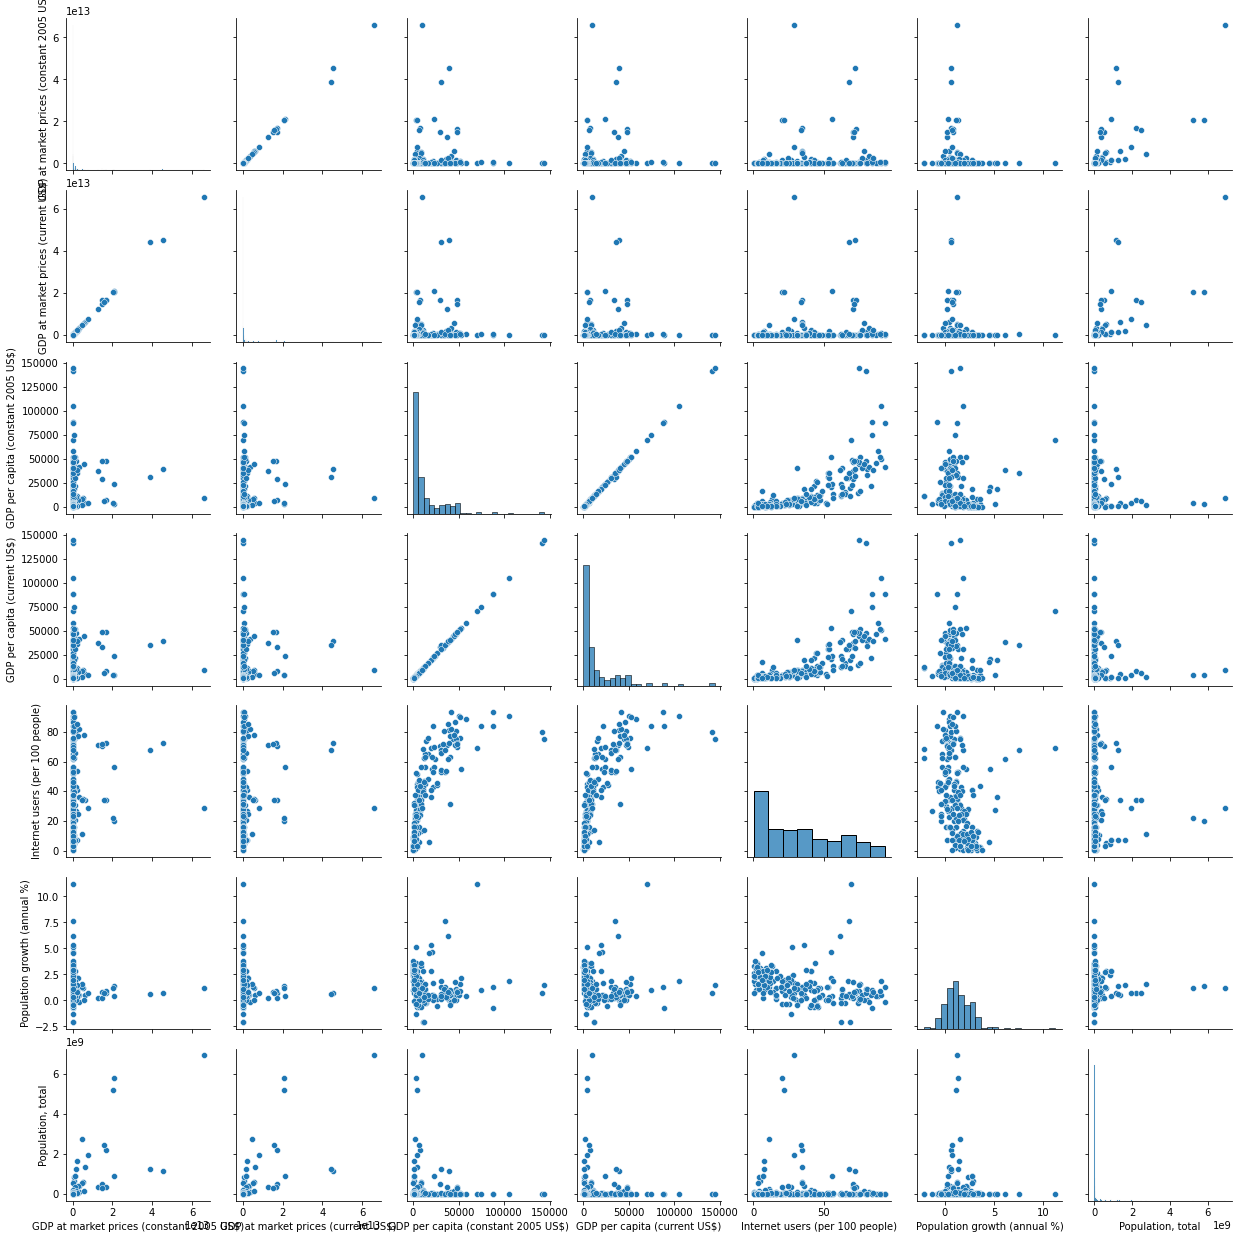

In [9]:
# We only want the numeric columns, so we will temporarily drop the 'Country Name' column
X = df_cleaned.drop('Country Name', axis = 1)
sns.pairplot(X)

The pairplots don't seem to highlight any particular situation, the points seem to be grouped together quite often, usually along one of the axes. Only certain plots like (2,4); (3,4); (4,2) (0-indexed) seem to show some more interesting configurations.

## 3. Produce a box plot of the numeric columns of df and comment relevant situations (2pt)

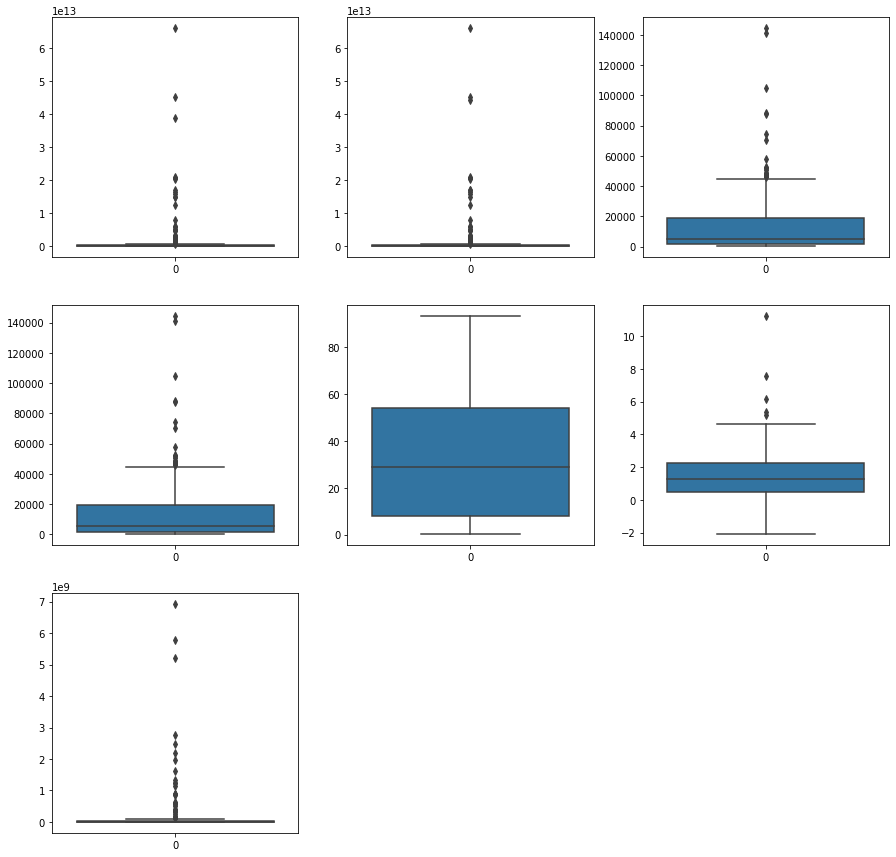

In [10]:
# We will create a big figure and plot them one by one as subplots
plt.figure(figsize=(15,15))
pos = 1
for i in X.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X[i])
    pos += 1

From these plots, we can see that in certain plots, like "GDP at market prices (constant 2005 US$)", "GDP at market prices (current US$)" and "Population, total" the values are compressed in one area and there are quite a few outliers; the same, although in a less extreme fashion can be said for the "GDP per capita (constant 2005 US$)" and "GDP per capita (current US$)", although the median value tends to be on the low end of the spectrum.
The "Population growth (annual %)" plot is much more balanced and with very few outliers, while the "Internet users (per 100 people)" plot does not have any outlier at all. 

## 4. Produce the correlation matrix of the data and eliminate the redundant attributes, if it is adequate (4pt)
• _For example, if attributes a and b have high correlation (e.g. absolute value higher than 0.95) one of the two can be eliminated_


We will use Pandas's `corr()` function to obtain the correlation matrix

In [11]:
correlation_matrix = X.corr()
correlation_matrix

#marco lorenzo faremmo così
#sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)

,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
GDP at market prices (constant 2005 US$),1.000000,0.998671,0.082985,0.089343,0.140434,-0.103056,0.743659
GDP at market prices (current US$),0.998671,1.000000,0.084445,0.091601,0.143265,-0.103523,0.731674
GDP per capita (constant 2005 US$),0.082985,0.084445,1.000000,0.999829,0.757132,-0.101623,-0.076738
GDP per capita (current US$),0.089343,0.091601,0.999829,1.000000,0.758325,-0.102485,-0.075101
Internet users (per 100 people),0.140434,0.143265,0.757132,0.758325,1.000000,-0.356460,-0.062403
Population growth (annual %),-0.103056,-0.103523,-0.101623,-0.102485,-0.356460,1.000000,-0.037483
"Population, total",0.743659,0.731674,-0.076738,-0.075101,-0.062403,-0.037483,1.000000


Unsurprisingly, the correlation matrix shows how the GDP features expressed in both 2005 US$ and current US$ are very highly correlated, we will drop the columns with current US$ representations, as the data points seem to be more clumped up in them

In [12]:
columns_to_drop = ['GDP at market prices (current US$)', 'GDP per capita (current US$)']
X = X.drop(columns_to_drop, axis = 1)

# Check that everything went as we'd expect
X.head()

,GDP at market prices (constant 2005 US$),GDP per capita (constant 2005 US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,1.593680e+10,553.300289,4.0,2.812617,28803167.0
1,1.192695e+10,4094.358832,45.0,-0.496462,2913021.0
2,1.612073e+11,4463.394675,12.5,1.821358,36117637.0
4,3.355695e+09,39736.354063,81.0,-0.015393,84449.0
5,8.247091e+10,3529.053482,2.8,3.570099,23369131.0


## 5. Split the reduced data: store the first column in a vector keys and the others in a matrix X (2pt)

We had already stored the reduced data in X, so we will just save the first column of the dataframe in y

In [13]:
y = df['Country Name']

## 6. Find the best clustering scheme for the data (possibly reduced after step 4) with a method of your choice, plot global silhouette index for an appropriate range of hyperparameter(s) and  show the chosen hyperparameter(s) (4pt)

In order to find a clustering scheme, we will use K-means with the elbow method, ranging from 2 to 10 clusters

In [14]:
# Range of possible clusters
k_range = range(2,11)

# Silhouette Score as measure
silhouette_scores = []

for i in k_range:
    
    km = KMeans(n_clusters = i, 
                init = 'k-means++', 
                n_init = 10, 
                max_iter = 300, 
                random_state = random_state)

    y_km = km.fit_predict(X)
    silhouette_scores.append(silhouette_score(X,y_km))

Plot silhouette scores

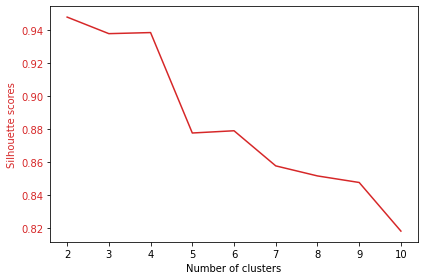

In [15]:
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores', color=color)
ax.plot(k_range, silhouette_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

The silhouette scores plot tells us that we achieve the best results with 2 clusters

In [16]:
# 2 is our starting point for the range
best_k = np.argmax(silhouette_scores) + 2

#marco lorenzo non siamo d'accordo e faremmo con 2 (non 5)

## 7. fit the clustering scheme to y, then produce the silhouette plot using the function plot_silhouette contained in the attached file (4pt)

In [17]:
km = KMeans(n_clusters = best_k, 
            init = 'k-means++', 
            n_init = 10, 
            max_iter = 300, 
            random_state = random_state);

# We need the appropriate value of y_km with our best_k
y_km = km.fit_predict(X)

# Fit the clustering scheme to y
km.fit(X, y = y)

KMeans(n_clusters=2, random_state=42)

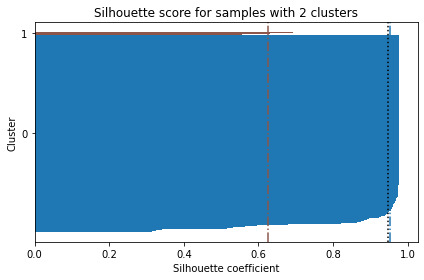

In [18]:
# produce the silhouette plot using the function plot_silhouette
silhouette_score_samples = silhouette_samples(X, y_km, metric='euclidean')
plt.title(f'Silhouette score for samples with {best_k} clusters')
plot_silhouette(silhouette_score_samples, y_km)

## 8. Perform a logarithmic transformation of the data (4pt)
• _This means simply to apply the log function of numpy_

• _If one of the columns has zero or negative values, avoid its transformation_

In [19]:
for column in X.columns:

    # We don't want to transform columns with values
    # Lower than or equal to zero
    if len(X[column]) != sum(np.greater(X[column], 0)):
        continue

    X[column] = np.log(X[column])

In [20]:
# Check the results
X

,GDP at market prices (constant 2005 US$),GDP per capita (constant 2005 US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,23.491897,6.315901,1.386294,2.812617,17.175996
1,23.202067,8.317365,3.806662,-0.496462,14.884701
2,25.805957,8.403665,2.525729,1.821358,17.402292
4,21.933925,10.590022,4.394449,-0.015393,11.343903
5,25.135711,8.168785,1.029619,3.570099,16.966927
...,...,...,...,...,...
237,22.910788,7.757359,3.621671,2.898629,15.153429
238,31.819987,9.160766,3.362250,1.218629,22.659220
239,24.154240,7.177196,2.513656,2.713034,16.977044
240,23.732189,7.288390,2.302585,2.883152,16.443798


## 9. repeat point 5 and 6 above and comment the comparison with the result of point 6 (2pt)

### Point 5

In [21]:
new_X = X.drop('GDP at market prices (constant 2005 US$)', axis = 1)
new_y = X['GDP at market prices (constant 2005 US$)']

### Point 6

In [22]:
# Range of possible clusters
k_range = range(2,11)

# Silhouette Score as measure
silhouette_scores = []

for i in k_range:
    
    km = KMeans(n_clusters = i, 
                init = 'k-means++', 
                n_init = 10, 
                max_iter = 300, 
                random_state = random_state)

    new_y_km = km.fit_predict(new_X)
    silhouette_scores.append(silhouette_score(new_X,new_y_km))

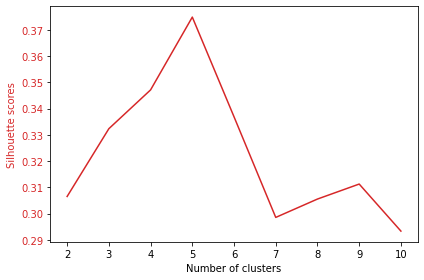

In [23]:
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores', color=color)
ax.plot(k_range, silhouette_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

By dropping the column 'GDP at market prices (constant 2005 US$)', the silhouette score now tells us that the best clustering scheme would involve 5 clusters, instead of 2